In [126]:
import pandas as pd
import pymongo
import sys 
sys.path.append("../") 
import src.support as sp 
import seaborn as sns

In [115]:
df_cinema_award = pd.read_csv("../data/Cinema_Awards.csv", index_col=0)

In [116]:
# Conect with Mongo

client = pymongo.MongoClient()
client

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [117]:
# Check our databases

client.list_database_names()

['Cinema_Awards_db', 'admin', 'alojamientos', 'config', 'local']

In [118]:
# Create a new database on Mongo DB

mydb = client["Cinema_Awards_db"]

In [119]:
# Create a brand new collectionion in our database

collection = mydb.details

In [120]:
# Insert data from our dataframe

collection.insert_many(df_cinema_award.to_dict("records"))

In [121]:
# Pass the query parameter without any specification, so it will return all the elements of the database

collection.find()

In [122]:
list(collection.find())[3]

{'_id': ObjectId('63cd70ae59897d38f53611fc'),
 'year_ceremony': 1990,
 'category': 'Actor In A Leading Role',
 'name': 'Morgan Freeman',
 'film': 'Driving Miss Daisy',
 'oscar': 'Nominee',
 'golden_globe': 'No',
 'sag': 'No',
 'cca': 'No'}

In [123]:
cond1 = {'year_ceremony': {"$eq": 2020}}
cond2 = {'oscar': {"$eq": "Winner"}}
cond3 = {'golden_globe': {"$eq": "Winner"}}
cond4 = {'sag': {"$eq": "Winner"}}
cond5 = {'cca': {"$eq": "Winner"}}

df_2020 = pd.DataFrame(collection.find({'$and':[cond1],'$or': [cond2, cond3, cond4, cond5]}))
df_2020.head(10)

,_id,year_ceremony,category,name,film,oscar,golden_globe,sag,cca
0,63cd70ae59897d38f5361769,2020,Actor In A Leading Role,Joaquin Phoenix,Joker,Winner,No,No,No
1,63cd70ae59897d38f536176f,2020,Actor In A Supporting Role,Brad Pitt,Once Upon A Time...In Hollywood,Winner,No,No,No
2,63cd70ae59897d38f5361774,2020,Actress In A Leading Role,Renée Zellweger,Judy,Winner,No,No,No
3,63cd70ae59897d38f5361776,2020,Actress In A Supporting Role,Laura Dern,Marriage Story,Winner,No,No,No
4,63cd70ae59897d38f536177e,2020,Directing,Bong Joon Ho,Parasite,Winner,No,No,No
5,63cd70ae59897d38f5361783,2020,International Feature Film,South Korea,Parasite,Winner,No,No,No
6,63cd70ae59897d38f536178c,2020,Best Picture,"Kwak Sin Ae and Bong Joon Ho, Producers",Parasite,Winner,No,No,No
7,63cd70ae59897d38f536178e,2020,Writing (Adapted Screenplay),Screenplay by Taika Waititi,Jojo Rabbit,Winner,No,No,No
8,63cd70ae59897d38f5361796,2020,Writing (Original Screenplay),"Screenplay by Bong Joon Ho, Han Jin Won; Story...",Parasite,Winner,No,No,No
9,63cd70ae59897d38f5361c59,2020,Actress In A Leading Role - Drama,Renée Zellweger,Judy,No,Winner,No,No


In [128]:
df_oscar_race1 = sp.create_year_range_df(1990, 2000, df_2020)

AttributeError: module 'src.support' has no attribute 'create_year_range_df'

In [ ]:
pd.options.display.max_rows = None

In [ ]:
# Create a new column indicating whether the nominee or winner won an Oscar

df_oscar_race['oscar_win'] = df_oscar_race.apply(lambda x: 1 if x['oscar'] == 'Winner' else 0, axis=1)
df_oscar_race['golden_globe_win'] = df_oscar_race.apply(lambda x: 1 if x['golden_globe'] == 'Winner' else 0, axis=1)
df_oscar_race['sag_win'] = df_oscar_race.apply(lambda x: 1 if x['sag'] == 'Winner' else 0, axis=1)
df_oscar_race['cca_win'] = df_oscar_race.apply(lambda x: 1 if x['cca'] == 'Winner' else 0, axis=1)

# Group the dataframe by actor/actress and film

grouped = df_oscar_race.groupby(["year_ceremony", "film"])

# Calculate the number of Oscar wins, nominations, and wins in the other awards

df_correlation = grouped.agg({'oscar_win': 'sum', 'golden_globe_win': 'count', 'sag_win': 'sum', 'cca_win': 'sum'}).reset_index()

In [ ]:
df_correlation = df_correlation.sort_values(by='oscar_win', ascending=False)

C:\Users\juano\AppData\Local\Temp\ipykernel_4308\1024080143.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_correlation.corr()


<AxesSubplot: >

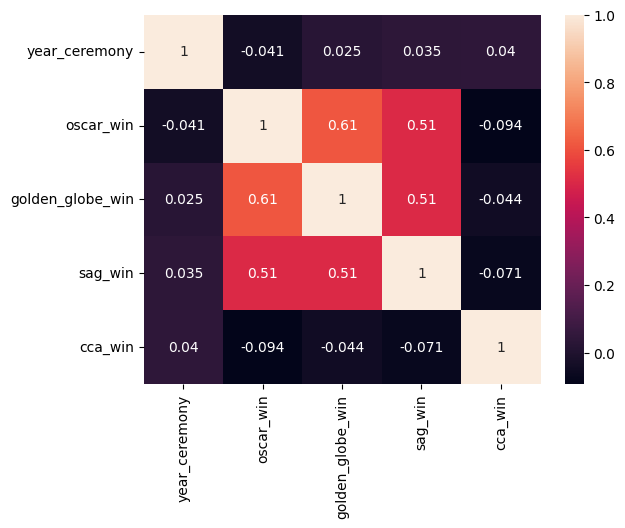

In [ ]:
# Calculate the correlation between the number of wins in the other awards and the number of Oscar wins
corr = df_correlation.corr()

# Visualize the correlation matrix
sns.heatmap(corr, annot=True)

<AxesSubplot: xlabel='year_ceremony', ylabel='golden_globe_win'>

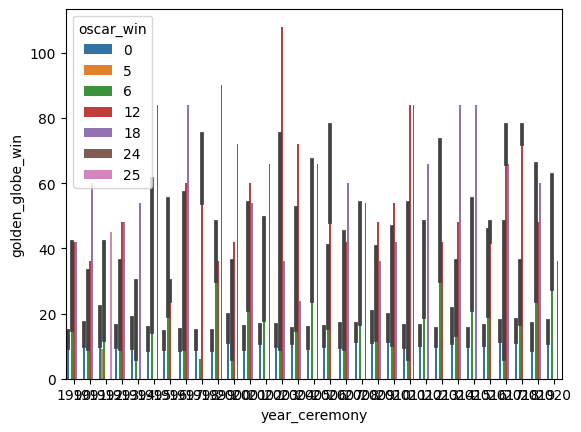

In [ ]:
sns.barplot(x='year_ceremony', y='golden_globe_win', hue='oscar_win', data=df_correlation)